In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\Kumar\OneDrive - The City University of New York\Desktop\NYL Data Analysis\train.csv')

In [3]:
df.shape

(316970, 28)

In [4]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [5]:
print("Total number of missing values:", df.isnull().sum().sum())

# display number of missing values in each column of the DataFrame
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

Total number of missing values: 65330

Number of missing values in each column:
Unnamed: 0                  0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               18398
emp_length              14676
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1396
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                213
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                30217
pub_rec_bankruptcies      430
address                     0
dtype: int64


In [6]:
df['emp_title'].value_counts()

Teacher                  3518
Manager                  3435
Registered Nurse         1485
RN                       1467
Supervisor               1465
                         ... 
Account Admin Rep           1
CITY OF SANTA BARBARA       1
dfas                        1
IT architect                1
McKinney and Silver         1
Name: emp_title, Length: 143510, dtype: int64

**there are around 18 k missing values for emp_title, replacing all those missing values would be cumbersome, moreover these are categorical values, so even imputation would not be possible. Removing rows containing missing values for empl_length would not be a huge concern as the removed rows would consist of only 4% of that data(after removing missing values for emp_title)**

In [7]:
df = df.drop(['emp_title'], axis=1)

In [8]:
df['loan_status']

0         Fully Paid
1         Fully Paid
2         Fully Paid
3         Fully Paid
4         Fully Paid
             ...    
316965    Fully Paid
316966    Fully Paid
316967    Fully Paid
316968    Fully Paid
316969    Fully Paid
Name: loan_status, Length: 316970, dtype: object

In [ ]:
df.shape

In [9]:
print("Total number of missing values:", df.isnull().sum().sum())

# display number of missing values in each column of the DataFrame
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

Total number of missing values: 46932

Number of missing values in each column:
Unnamed: 0                  0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              14676
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1396
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                213
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                30217
pub_rec_bankruptcies      430
address                     0
dtype: int64


**The missing values from mort_acc,pub_rec_bankruptcies,title and emp_length comprise of less than 15% of that total data so for simplicity these NaN values pertaining to these features will be removed**

In [10]:
df_cleaned = df.dropna(subset=['emp_length','title','revol_util','mort_acc','pub_rec_bankruptcies'])

In [11]:
print("Total number of missing values:", df_cleaned.isnull().sum().sum())

# display number of missing values in each column of the DataFrame
print("\nNumber of missing values in each column:")
print(df_cleaned.isnull().sum())

Total number of missing values: 0

Number of missing values in each column:
Unnamed: 0              0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64


Investigating to see if addresss can be modfied

In [12]:
 df_cleaned['address'].value_counts()

USCGC Miller\r\nFPO AA 22690                                     6
USNV Brown\r\nFPO AA 48052                                       6
USS Smith\r\nFPO AP 70466                                        5
USCGC Lee\r\nFPO AA 22690                                        5
USCGC Jones\r\nFPO AE 30723                                      5
                                                                ..
909 Parrish Junction Suite 685\r\nEast Allisonburgh, IL 86630    1
Unit 7498 Box 9321\r\nDPO AA 86630                               1
50100 Henderson Brooks\r\nSouth Haleyfort, WY 05113              1
USNS Elliott\r\nFPO AA 30723                                     1
77487 Wood Causeway Apt. 440\r\nShannonmouth, AR 22690           1
Name: address, Length: 270326, dtype: int64

In [26]:
df_cleaned['zip_column'] = df_cleaned['address'].str.extract(r'(\d{5}$)')

C:\Users\Kumar\AppData\Local\Temp\ipykernel_9976\632259527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['zip_column'] = df_cleaned['address'].str.extract(r'(\d{5}$)')


In [25]:
#df_cleaned['zip_column'] = np.where(df_cleaned['address'].str.contains(r'\d{5}$'), df_cleaned['address'].str.extract(r'(\d{5}$)'), None)

In [20]:
df_cleaned.shape

(271517, 29)

In [27]:
df_cleaned['zip_column'].value_counts()

70466    38993
30723    38745
22690    38703
48052    38371
00813    31395
29597    31199
05113    30987
11650     7819
93700     7695
86630     7610
Name: zip_column, dtype: int64

**zip codes from addresses can be included as there are only 10 zip codes present in the dataset**

In [28]:
df_cleaned.drop(['address'], axis=1,inplace = True)

C:\Users\Kumar\AppData\Local\Temp\ipykernel_9976\3449142340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['address'], axis=1,inplace = True)


In [29]:
df_cleaned.drop(['title'], axis=1,inplace = True)

C:\Users\Kumar\AppData\Local\Temp\ipykernel_9976\817491009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['title'], axis=1,inplace = True)


In [30]:
df_cleaned.drop(['issue_d'], axis=1,inplace = True)

C:\Users\Kumar\AppData\Local\Temp\ipykernel_9976\2638716161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['issue_d'], axis=1,inplace = True)


In [19]:
df_cleaned.drop(['earliest_cr_line'], axis=1,inplace = True)

C:\Users\Kumar\AppData\Local\Temp\ipykernel_14720\3349737366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['earliest_cr_line'], axis=1,inplace = True)


In [32]:
df_cleaned.drop(['zip_column33'], axis=1,inplace = True)

C:\Users\Kumar\AppData\Local\Temp\ipykernel_9976\2766556805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['zip_column33'], axis=1,inplace = True)


In [33]:
def one_hot_encode_selected_columns(dataframe, columns):
    """
    Apply one-hot encoding (pd.get_dummies) to selected columns of a DataFrame.

    Parameters:
        - dataframe: The DataFrame containing the data.
        - columns: A list of column names to one-hot encode.

    Returns:
        - A new DataFrame with one-hot encoded columns.
    """
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Input 'dataframe' must be a pandas DataFrame.")
    
    # Ensure selected columns exist in the DataFrame
    for column in columns:
        if column not in dataframe.columns:
            raise ValueError(f"Column '{column}' does not exist in the DataFrame.")
    
    # Apply one-hot encoding to selected columns
    encoded_df = pd.get_dummies(dataframe, columns=columns, drop_first=True)
    
    return encoded_df

In [34]:
df_cleaned.dtypes

Unnamed: 0                int64
loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
zip_column               object
dtype: object

In [36]:
columns_to_encode = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type','zip_column']

In [37]:
df_cleaned_final = one_hot_encode_selected_columns(df_cleaned,columns_to_encode)

In [38]:
df_cleaned_final.head(10)

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,application_type_JOINT,zip_column_05113,zip_column_11650,zip_column_22690,zip_column_29597,zip_column_30723,zip_column_48052,zip_column_70466,zip_column_86630,zip_column_93700
0,0,6400.0,15.61,223.78,60000.0,25.72,Nov-2003,12.0,0.0,31228.0,...,0,0,0,0,0,0,1,0,0,0
1,1,25000.0,19.99,662.21,67000.0,20.49,Jun-1999,18.0,1.0,24755.0,...,0,1,0,0,0,0,0,0,0,0
2,2,15000.0,5.32,451.73,59000.0,11.50,Oct-1998,12.0,0.0,8925.0,...,0,1,0,0,0,0,0,0,0,0
3,3,16000.0,15.61,559.44,72000.0,29.40,Dec-1999,8.0,0.0,6972.0,...,0,1,0,0,0,0,0,0,0,0
4,4,8725.0,12.12,290.30,50000.0,22.88,Jul-1988,10.0,0.0,25397.0,...,0,0,0,0,0,0,0,0,0,0
6,6,35000.0,17.14,872.48,155000.0,24.46,Feb-1969,13.0,0.0,33475.0,...,0,0,0,0,0,0,0,1,0,0
7,7,12000.0,17.57,301.93,37000.0,12.21,Sep-2005,17.0,0.0,7924.0,...,0,0,0,0,0,0,0,1,0,0
10,10,3925.0,6.39,120.11,33000.0,3.35,Feb-2004,4.0,0.0,3946.0,...,0,0,0,1,0,0,0,0,0,0
11,11,24000.0,23.63,685.29,85000.0,14.15,Jan-2007,7.0,0.0,23168.0,...,0,0,0,0,0,0,0,1,0,0
12,12,1400.0,17.77,50.46,80000.0,19.20,Aug-2000,15.0,1.0,12784.0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
df_cleaned_final.drop(['Unnamed: 0'], axis=1,inplace = True)

In [40]:
df_cleaned_final.shape

(271517, 97)

Removing Outliers from the Dataset based on our Observations of features from the EDA viz conducted earlier

In [41]:
def display_individual_boxplots(dataframe, columns):
    """
    Display individual box plots for selected columns of a DataFrame.

    Parameters:
        - dataframe: The DataFrame containing the data.
        - columns: A list of column names for which individual box plots will be displayed.

    Returns:
        - None (displays the box plots)
    """
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Input 'dataframe' must be a pandas DataFrame.")
    
    # Ensure selected columns exist in the DataFrame
    for column in columns:
        if column not in dataframe.columns:
            raise ValueError(f"Column '{column}' does not exist in the DataFrame.")
    
    # Create individual box plots for selected columns
    for column in columns:
        plt.figure(figsize=(6, 4))
        dataframe[column].plot(kind='box')
        plt.title(f"Box Plot for {column}")
        plt.ylabel("Values")
        plt.show()

In [42]:
cols = ['open_acc','total_acc','mort_acc','revol_bal','dti','annual_inc']

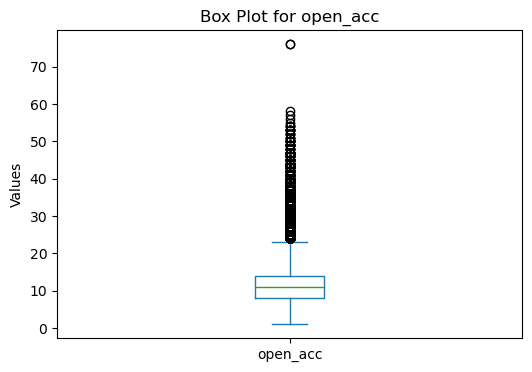

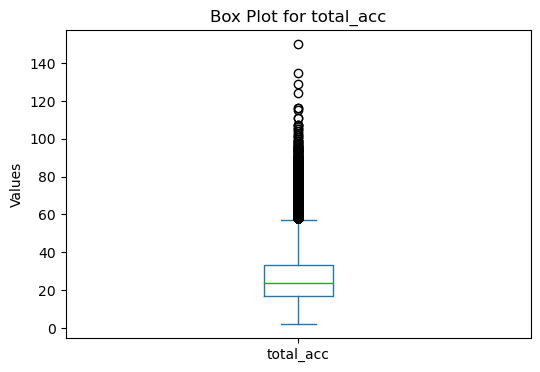

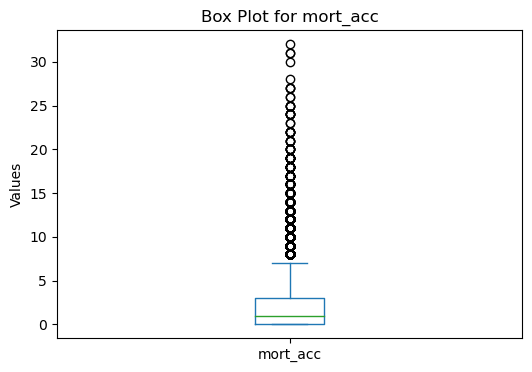

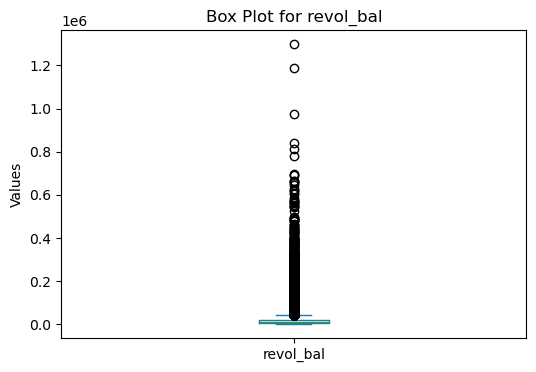

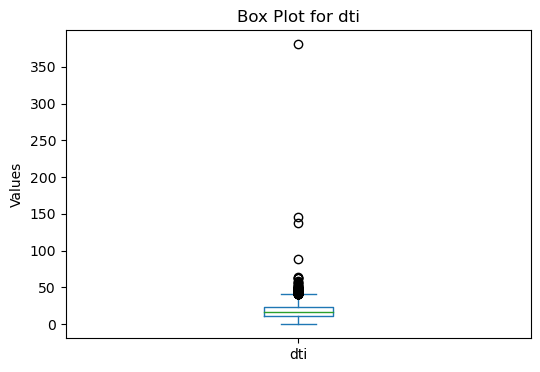

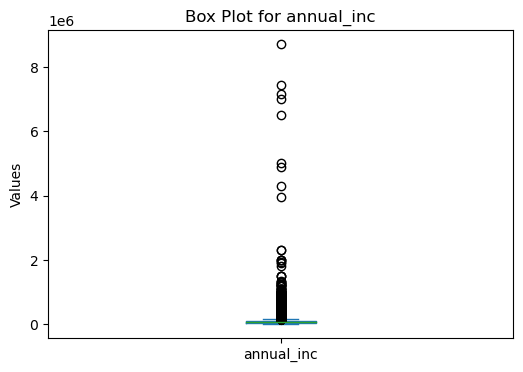

In [43]:
display_individual_boxplots(df_cleaned_final, cols)

In [44]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [45]:
iqr_capping(df_cleaned_final, cols, 1.5)

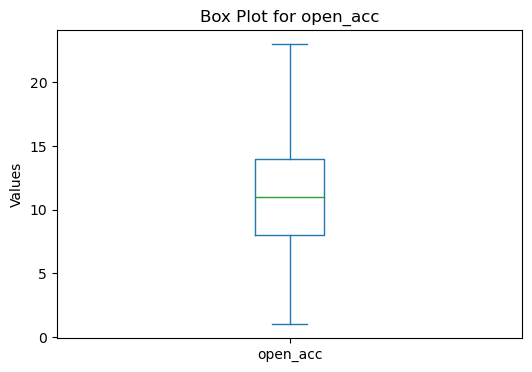

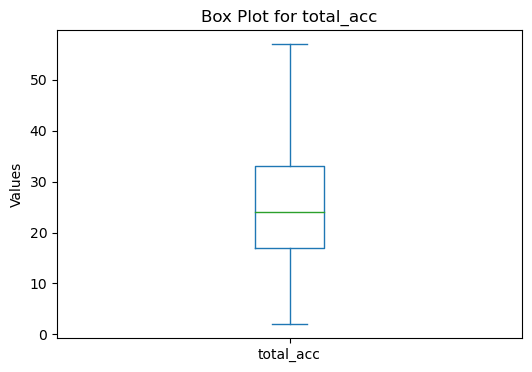

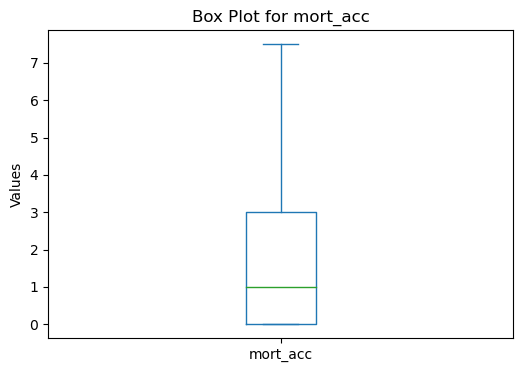

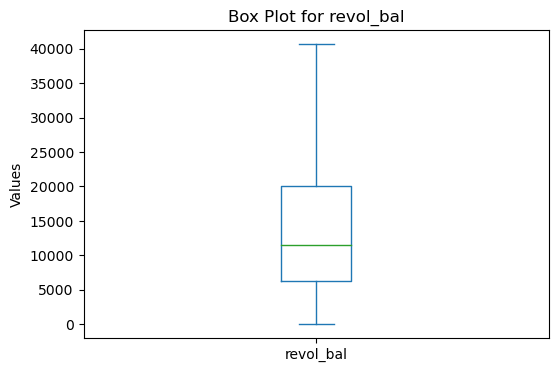

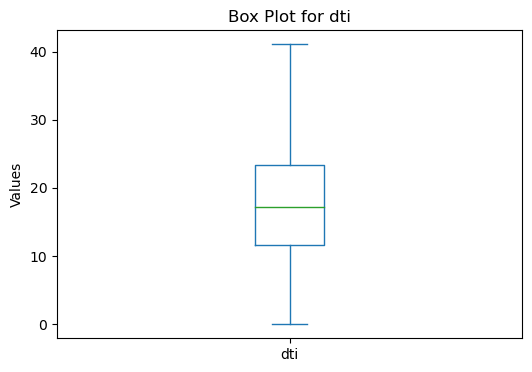

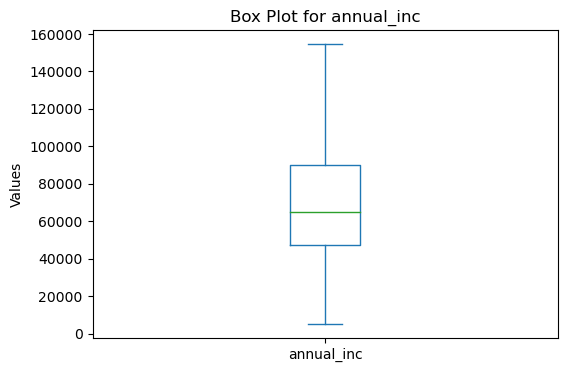

In [46]:
display_individual_boxplots(df_cleaned_final, cols)

In [47]:
if df_cleaned_final.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [48]:
df_cleaned_final.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'term_ 60 months',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
   

In [49]:
for i in df_cleaned_final.columns:
    print(i)

loan_amnt
int_rate
installment
annual_inc
dti
earliest_cr_line
open_acc
pub_rec
revol_bal
revol_util
total_acc
mort_acc
pub_rec_bankruptcies
term_ 60 months
grade_B
grade_C
grade_D
grade_E
grade_F
grade_G
sub_grade_A2
sub_grade_A3
sub_grade_A4
sub_grade_A5
sub_grade_B1
sub_grade_B2
sub_grade_B3
sub_grade_B4
sub_grade_B5
sub_grade_C1
sub_grade_C2
sub_grade_C3
sub_grade_C4
sub_grade_C5
sub_grade_D1
sub_grade_D2
sub_grade_D3
sub_grade_D4
sub_grade_D5
sub_grade_E1
sub_grade_E2
sub_grade_E3
sub_grade_E4
sub_grade_E5
sub_grade_F1
sub_grade_F2
sub_grade_F3
sub_grade_F4
sub_grade_F5
sub_grade_G1
sub_grade_G2
sub_grade_G3
sub_grade_G4
sub_grade_G5
emp_length_10+ years
emp_length_2 years
emp_length_3 years
emp_length_4 years
emp_length_5 years
emp_length_6 years
emp_length_7 years
emp_length_8 years
emp_length_9 years
emp_length_< 1 year
home_ownership_MORTGAGE
home_ownership_NONE
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
verification_status_Source Verified
verification_status_

In [70]:
df_cleaned_final.drop(['earliest_cr_line'], axis=1,inplace = True)

In [51]:
df_cleaned_final[df_cleaned_final['loan_status_Fully Paid'] == 0]

,loan_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,...,application_type_JOINT,zip_column_05113,zip_column_11650,zip_column_22690,zip_column_29597,zip_column_30723,zip_column_48052,zip_column_70466,zip_column_86630,zip_column_93700
6,35000.0,17.14,872.48,154500.0,24.46,Feb-1969,13.0,0.0,33475.0,65.9,...,0,0,0,0,0,0,0,1,0,0
11,24000.0,23.63,685.29,85000.0,14.15,Jan-2007,7.0,0.0,23168.0,96.9,...,0,0,0,0,0,0,0,1,0,0
21,14675.0,24.50,426.44,49000.0,27.48,Dec-1999,8.0,1.0,4746.0,51.6,...,0,0,0,0,0,0,0,0,1,0
25,13375.0,18.25,485.22,40000.0,7.14,May-1997,5.0,2.0,8195.0,88.1,...,0,0,0,1,0,0,0,0,0,0
26,28000.0,20.49,749.49,130000.0,15.64,Jan-2002,10.0,0.0,17610.0,82.7,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316933,20050.0,21.49,760.44,75000.0,9.87,Mar-2004,8.0,0.0,5327.0,42.6,...,0,0,1,0,0,0,0,0,0,0
316941,25000.0,11.44,549.07,95000.0,6.52,May-1996,8.0,0.0,26325.0,66.8,...,0,0,0,1,0,0,0,0,0,0
316948,16325.0,17.86,589.05,88000.0,12.07,Nov-2006,10.0,0.0,2604.0,22.8,...,0,0,0,0,0,0,0,0,0,1
316950,10875.0,25.80,324.32,40000.0,20.70,May-2003,11.0,1.0,4892.0,57.6,...,0,0,0,0,0,0,0,0,0,1


In [106]:
df_cleaned_final['loan_status_Fully Paid']

0         0
1         0
2         0
3         0
4         0
         ..
316964    0
316965    0
316966    0
316967    0
316969    0
Name: loan_status_Fully Paid, Length: 271517, dtype: uint8

In [107]:
df_cleaned_final.to_csv('final_encoded_dataset.csv')

In [71]:
X = df_cleaned_final.drop(columns=['loan_status_Fully Paid'])

In [66]:
y = df_cleaned_final['loan_status_Fully Paid']

In [61]:
y

0         0
1         0
2         0
3         0
4         0
         ..
316964    0
316965    0
316966    0
316967    0
316969    0
Name: loan_status_Fully Paid, Length: 271517, dtype: uint8

Switching up the 'y' where 1 should represent a person who defaulted and 0 represents a person who did not default

In [72]:
for index,row in df_cleaned_final.iterrows():
    if row['loan_status_Fully Paid'] == 1:
        df_cleaned_final.at[index, 'loan_status_Fully Paid'] = 0
    else:
        df_cleaned_final.at[index, 'loan_status_Fully Paid'] = 1

In [73]:
y = df_cleaned_final['loan_status_Fully Paid']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X.dtypes

loan_amnt           float64
int_rate            float64
installment         float64
annual_inc          float64
dti                 float64
                     ...   
zip_column_30723      uint8
zip_column_48052      uint8
zip_column_70466      uint8
zip_column_86630      uint8
zip_column_93700      uint8
Length: 96, dtype: object

In [75]:
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64','uint8']).columns.tolist()
print("Columns with non-numeric data:")
print(non_numeric_columns)

Columns with non-numeric data:
[]


In [76]:
scaler = MinMaxScaler()

# Fit and transform the scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Creating DataFrames from the scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Original Train Data:")
print(X_train)
print("\nScaled Train Data using MinMaxScaler:")
print(X_train_scaled_df)

Original Train Data:
        loan_amnt  int_rate  installment  annual_inc    dti  open_acc  \
191045    10000.0     14.99       346.61     65000.0  33.71      21.0   
224980    19600.0     17.10       488.17     50000.0  26.69      14.0   
77616      6000.0     15.10       208.29     38000.0  31.36       9.0   
17580     21000.0     18.55       539.57    100000.0  13.91      14.0   
225285     1200.0     14.31        41.20     28000.0   9.39       7.0   
...           ...       ...          ...         ...    ...       ...   
140051    16000.0     16.78       395.76     48458.0  17.06       9.0   
302517    12000.0     13.11       404.97     80000.0  28.90       9.0   
154077    25000.0      6.99       771.82    135000.0  23.45      15.0   
171515    24175.0     18.25       877.02    154500.0  16.54      10.0   
142450    18000.0     18.99       659.72    130000.0  33.73      19.0   

        pub_rec  revol_bal  revol_util  total_acc  ...  \
191045      0.0    38039.0        76.5      

Features considered by the model

**moving from L1 to SHAPELY**

In [ ]:
   
#Define your metric
class_names = ['Not Defaulted', 'Defaulted']

#Load the SHAP explainer, since LightGBM is a decision tree, I used TreeExplainer
explainer = shap.TreeExplainer(lgb_model)
#We train the SHAP values on the features based on the validation set
shap_values = explainer.shap_values(X_val) 


plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
shap.summary_plot(shap_values, X_val.values, plot_type='bar', class_names=class_names, feature_names=X_val.columns, max_display=20, show=False, plot_size=None)
#plt.title(f'{title} – Weight of the impact of each feature')

plt.subplot(1,2,2)
#shap_values[n] evaluates the impact of features for predicting satisfaction
#n = 0 -- not happy, n = 1 -- happy
shap.summary_plot(shap_values[1], X_val.values, feature_names=X_val.columns, max_display=20, show=False,  plot_size=None)
#plt.title(f'{title} – Directional impact of each feature')
plt.tight_layout()

#To save a picture of your SHAP viz
#plt.savefig(f'{title}.png', bbox_inches='tight', dpi=100)

plt.show()

In [84]:
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
X_test_scaled

In [85]:
###Instantiating Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)
###Fitting Random Forest Classifier to training data
rf.fit(X_train_scaled, y_train)
###Print accuracy and recall scores for both test and train
###Average is set to micro for recall score since this is a ###multi-class classification model. Micro-average aggregates the ###contributions of all classes to compute the average metric. Micro ###is preferred for data with class imbalance.


Test Accuracy:
0.8861962286387743
Test Recall:
0.8861962286387743
Train Accuracy:


ValueError: Found input variables with inconsistent numbers of samples: [217213, 54304]

In [88]:
print('Test Accuracy:')
print(accuracy_score(y_test, rf.predict(X_test_scaled)))
print('Test Recall:')
print(recall_score(y_test, rf.predict(X_test_scaled)))
print('Train Accuracy:')
print(accuracy_score(y_train, rf.predict(X_train_scaled)))
print('Train Recall:')
print(recall_score(y_train, rf.predict(X_train_scaled)))

Test Accuracy:
0.8861962286387743
Test Recall:
0.4485327936712354
Train Accuracy:
1.0
Train Recall:
1.0


In [82]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import pandas as pd
import numpy as np


# let's initialize a RF model 
model = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True, max_depth=6, random_state=42)

# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto'
)

# train Boruta
# N.B.: X and y must be numpy arrays
feat_selector.fit(X_train_scaled_df.values, y_train.values)

# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X_train_scaled_df.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X_train_scaled_df.columns[i], " - Ranking: ", feat_selector.ranking_[i])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	43
Tentative: 	18
Rejected: 	34
Iteration: 	9 / 100
Confirmed: 	43
Tentative: 	18
Rejected: 	34
Iteration: 	10 / 100
Confirmed: 	43
Tentative: 	18
Rejected: 	34
Iteration: 	11 / 100
Confirmed: 	43
Tentative: 	18
Rejected: 	34
Iteration: 	12 / 100
Confirmed: 	44
Tentative: 	17
Rejected: 	34
Iteration: 	13 / 100
Confirmed: 	44
Tentative: 	17
Rejected: 	34
Iteration: 	14 / 100
Confirmed: 	44
Tentative: 	15
Rejected: 	36
Iteration: 	15 / 100
Confirmed: 	44
Tentative: 	15
Rejected: 	36
Iteration: 	16 / 100
Confirmed: 	45
Tentative: 	

In [ ]:
df_cleaned_final.values

In [105]:
###Print accepted features as well as features that boruta did not ###deem unimportant or important (area of irresolution)
accept = X.columns[feat_selector.support_].to_list()
irresolution = X.columns[feat_selector.support_weak_].to_list()

In [91]:
accept

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'term_ 60 months',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'home_ownership_MORTGAGE',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'zip_column_05113',
 'zip_column_11650',
 'zip_column_29597',
 'zip_column_48052',
 'zip_column_86630',
 'zip_column_93700']

In [92]:
irresolution

['sub_grade_C1', 'sub_grade_D2', 'sub_grade_D3', 'zip_column_30723']

From the above results we noticed that Boruta wasn't very helpful in explaining which features we needed and which we didn't, so  we shall go ahead and use SHAP technique to understand the impact of each feature and its importance on the target variable

In [93]:
X_train_scaled

array([[0.23076923, 0.37670432, 0.21215418, ..., 1.        , 0.        ,
        0.        ],
       [0.47692308, 0.45890144, 0.30663774, ..., 0.        , 0.        ,
        0.        ],
       [0.12820513, 0.38098948, 0.11983314, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.61538462, 0.06505649, 0.49595862, ..., 0.        , 0.        ,
        0.        ],
       [0.59423077, 0.50370082, 0.56617387, ..., 0.        , 0.        ,
        1.        ],
       [0.43589744, 0.53252824, 0.42113799, ..., 0.        , 0.        ,
        0.        ]])

In [96]:
len(X_train.columns)

95

In [99]:
len(X_train_scaled[0])

95

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 42925, number of negative: 174288
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 217213, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.197617 -> initscore=-1.401255
[LightGBM] [Info] Start training from score -1.401255


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


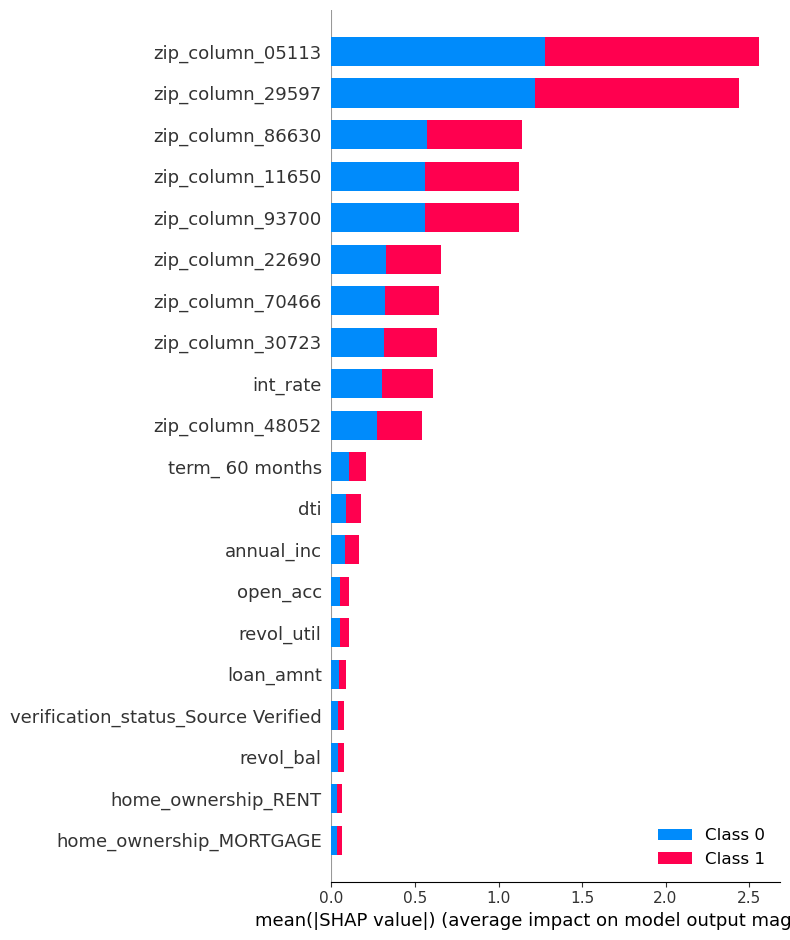

In [101]:
import lightgbm as lgb
import shap

shap.initjs()

lgb_dtrain = lgb.Dataset(data = X_train, label = y_train) 
lgb_param = {"objective": "binary", "metric": "binary_logloss"} #Binary
lgb_model = lgb.train(lgb_param, lgb_dtrain)

explainer_lgb = shap.TreeExplainer(lgb_model)
shap_values_lgb = explainer_lgb.shap_values(X_test)
shap.summary_plot(shap_values_lgb, X_test, plot_type = "bar")

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


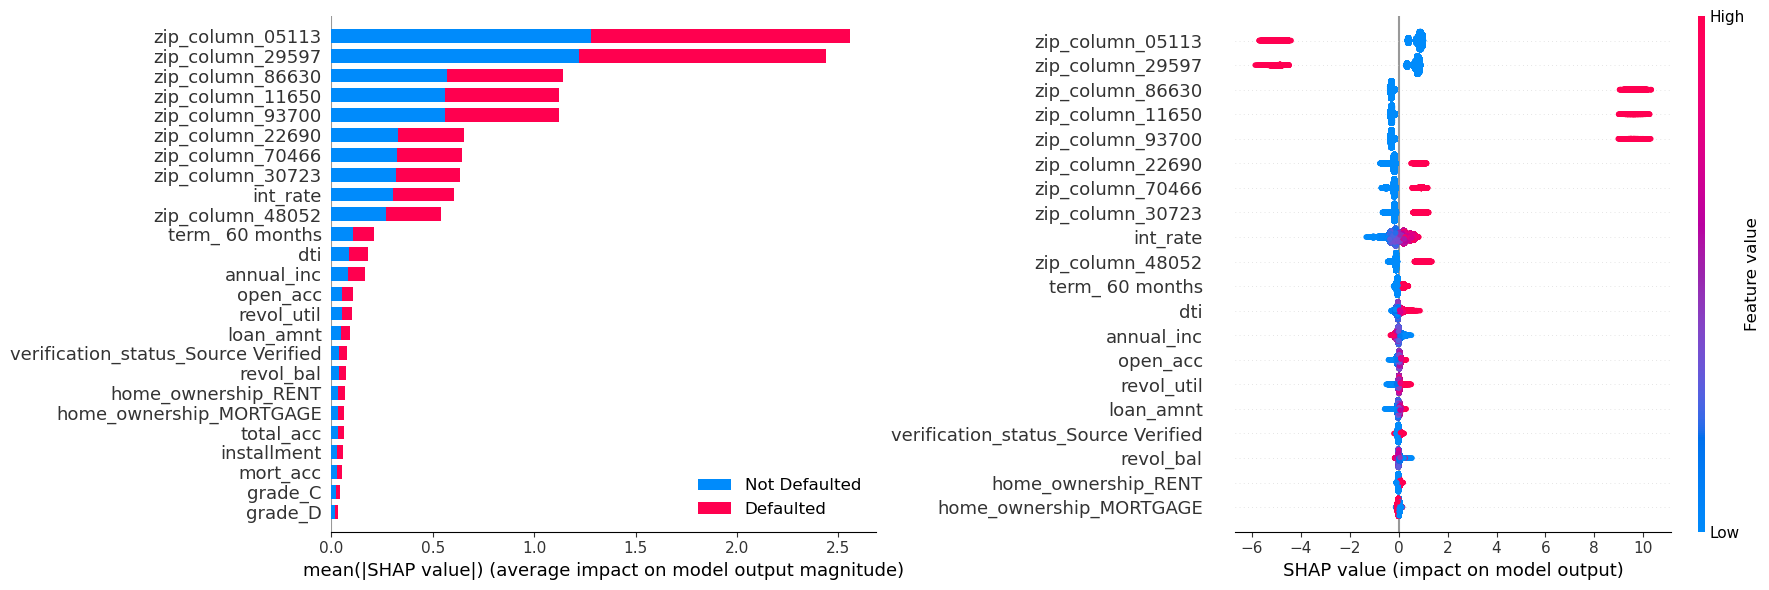

In [104]:
#Define your metric
class_names = ['Not Defaulted', 'Defaulted']

#Load the SHAP explainer, since LightGBM is a decision tree, I used TreeExplainer
explainer = shap.TreeExplainer(lgb_model)
#We train the SHAP values on the features based on the validation set
shap_values = explainer.shap_values(X_test) 


plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
shap.summary_plot(shap_values, X_test.values, plot_type='bar', class_names=class_names, feature_names=X_test.columns, max_display=25, show=False, plot_size=None)
#plt.title(f'{title} – Weight of the impact of each feature')

plt.subplot(1,2,2)
#shap_values[n] evaluates the impact of features for predicting satisfaction
#n = 0 -- not happy, n = 1 -- happy
shap.summary_plot(shap_values[1], X_test.values, feature_names=X_test.columns, max_display=20, show=False,  plot_size=None)
#plt.title(f'{title} – Directional impact of each feature')
plt.tight_layout()

#To save a picture of your SHAP viz
#plt.savefig(f'{title}.png', bbox_inches='tight', dpi=100)

plt.show()

From the SHAP results we can proceed to retain attributes like: 
    1.zip_code
    2.interest rate
    3.term
    4.loan_amnt(we had decided earlier during the EDA stage loan_amnt would be chosen over installment)
    5.dti
    6.annual_inc
    7.open_acc
    8.revol_util
    9.verification status
    10. revol_bal
    11. home_ownership
    
we shall retain loan grade,open_acc,pub_rec_bankruptcies,application_type as well